강의자 깃허브 : https://github.com/corazzon/boostcourse-ds-510

# 1. 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액  
- 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액  
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

## 1.1 가설 : K-뷰티 성장하고 있나?
K-뷰티 위키 : https://en.wikipedia.org/wiki/K-Beauty

e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연속

# 2. 필요 라이브러리 가져오기

In [1]:
# 라이브러리 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전 쥬피터 노트북 설정 : 쥬피터 노트북 상에 그래프 표시하는 설정
%matplotlib inline

In [2]:
# 시각화를 위한 폰트 설정
import os
print('Name of os:',os.name)
if os.name == 'posix':
    sns.set(font='AppleGothic')
elif os.name == 'nt':
    sns.set(font='Malgun Gothic')

Name of os: nt


In [3]:
# 레티나 설정 : 글씨가 좀 더 선명하게 보이고 폰트 주변이 흐릿하게 보이는 것을 방지한다.
%config InlineBackend.figure_format = 'retina'

# 3. 데이터 로드하기

In [4]:
df_raw = pd.read_csv('data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201127214829.csv', encoding='cp949')
df_raw

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,897205,921586,974060,1250236,1344404,1525396,1879499,1525487,1277716,1615969
1,합계,합계,면세점,-,-,-,-,-,-,-,...,725319,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1421509
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,171886,159750,203404,179543,187246,189024,223864,227997,225729,194460
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,3854,4320,4511,3702,4038,3670,3826,4142,3812,7777
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,6,1,215,2,0,1,70,113,0,3497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,...,469,504,589,465,488,308,531,384,334,353
447,기타,기 타,계,765,735,849,804,788,805,724,...,1063,1120,770,711,689,469,1094,939,710,761
448,기타,기 타,면세점,-,-,-,-,-,-,-,...,316,404,0,0,1,0,1,0,0,0


In [5]:
df_raw.shape

(450, 30)

In [6]:
# 국가(대륙)별 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts()

합계            45
기타            45
중남미           45
미국            45
대양주           45
중동            45
일본            45
유럽연합(EU)      45
중국            45
아세안(ASEAN)    45
Name: 국가(대륙)별, dtype: int64

In [7]:
# 미국 데이터만 따로 보기
df_raw[df_raw['국가(대륙)별']=='미국']

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,40207,37631,48978,40918,44861,55386,53848,48277,64225,53052
46,미국,합계,면세점,-,-,-,-,-,-,-,...,3603,2317,2079,2657,2951,1818,1481,698,339,81
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,36604,35314,46899,38261,41910,53568,52367,47579,63886,52971
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,1553,1784,1774,1298,1408,1653,1382,1182,1630,1923
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,1,0,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,1553,1784,1773,1298,1408,1653,1382,1182,1630,1923
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,1716,1723,1886,1845,1837,3166,1785,1830,2824,3286
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,38,72,52,66,116,107,49,12,2,5
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,1678,1651,1834,1779,1721,3059,1736,1818,2822,3281
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,251,172,269,88,156,118,338,135,182,137


# 4. 분석과 시각화를 위한 tidy data 만들기
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [8]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4',
       '2020 3/4 p)'],
      dtype='object')

In [9]:
df_raw.values

array([['합계', '합계', '계', ..., 1525487, 1277716, 1615969],
       ['합계', '합계', '면세점', ..., 1297490, 1051987, 1421509],
       ['합계', '합계', '면세점 이외', ..., 227997, 225729, 194460],
       ...,
       ['기타', '기 타', '계', ..., 939, 710, 761],
       ['기타', '기 타', '면세점', ..., 0, 0, 0],
       ['기타', '기 타', '면세점 이외', ..., 939, 710, 761]], dtype=object)

In [10]:
df_raw.melt?

In [11]:
df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'])

,국가(대륙)별,상품군별,판매유형별,variable,value
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
12145,기타,생활용품 및 자동차용품,면세점,2020 3/4 p),0
12146,기타,생활용품 및 자동차용품,면세점 이외,2020 3/4 p),353
12147,기타,기 타,계,2020 3/4 p),761
12148,기타,기 타,면세점,2020 3/4 p),0


In [12]:
df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], value_vars=['2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4',
       '2020 3/4 p)'])

,국가(대륙)별,상품군별,판매유형별,variable,value
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
12145,기타,생활용품 및 자동차용품,면세점,2020 3/4 p),0
12146,기타,생활용품 및 자동차용품,면세점 이외,2020 3/4 p),353
12147,기타,기 타,계,2020 3/4 p),761
12148,기타,기 타,면세점,2020 3/4 p),0


In [13]:
df = df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], var_name='기간', value_name='백만원')
df.shape

(12150, 5)

In [14]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  12150 non-null  object
 1   상품군별     12150 non-null  object
 2   판매유형별    12150 non-null  object
 3   기간       12150 non-null  object
 4   백만원      12150 non-null  object
dtypes: object(5)
memory usage: 474.7+ KB


# 5. 데이터 전처리

## 5.1 기간에서 연도를 분리하기
- object는 string 자료형을 의미한다.

- 기간에서 연도 분리하기

In [16]:
('2019 4/4 p').split()

['2019', '4/4', 'p']

In [17]:
type(('2019 4/4 p').split()[0])

str

In [18]:
int(('2019 4/4 p').split()[0])

2019

In [19]:
df['기간'].map?

In [ ]:
df['기간'].map

In [20]:
# 기간에서 연도만 분리하기
# map 안에 함수 사용 가능
df['연도'] = df['기간'].map(lambda x: int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


- 기간에서 분기만 분리하기

In [21]:
('2019 4/4 p').split()[1]

'4/4'

In [22]:
('2019 1/4 p').split()[1].split('/')[0]

'1'

In [23]:
# 기간에서 분기만 분리하기
# 분기 컬럼 만들기
df['분기'] = df['기간'].map(lambda x: int(x.split()[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


## 5.2 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기
- NaN이 float 타입이기 때문에 df['백만원']을 모두 float으로 변환

In [24]:
# - 문자를 결측치로 변경하고 float 타입으로 변경하기
# pd.np.nan : 판다스에 있는 numpy 사용 => The pandas.np module is deprecated and will be removed from pandas in a future version.
import numpy as np
df['백만원'] = df['백만원'].replace('-', np.nan).astype(float)
df['백만원']

0        148272.0
1             NaN
2             NaN
3          4915.0
4             NaN
           ...   
12145         0.0
12146       353.0
12147       761.0
12148         0.0
12149       761.0
Name: 백만원, Length: 12150, dtype: float64

In [25]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


## 5.3 필요없는 데이터 제거하기

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  12150 non-null  object 
 1   상품군별     12150 non-null  object 
 2   판매유형별    12150 non-null  object 
 3   기간       12150 non-null  object 
 4   백만원      8550 non-null   float64
 5   연도       12150 non-null  int64  
 6   분기       12150 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 664.6+ KB


In [27]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거한다.
df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계')].copy()

In [28]:
# info로 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10206 entries, 48 to 12149
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10206 non-null  object 
 1   상품군별     10206 non-null  object 
 2   판매유형별    10206 non-null  object 
 3   기간       10206 non-null  object 
 4   백만원      7182 non-null   float64
 5   연도       10206 non-null  int64  
 6   분기       10206 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 637.9+ KB


In [29]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# 6. K-Beauty 시각화

## 6.1 전체 상품군 판매액

In [32]:
# 판매유형별 데이터는 일부 기간에는 '계'만 존재하기 때문에
# 판매유형별 == '계' 데이터만 가져와서 봐야지
# 평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있다.
df_total = df[df['판매유형별']=='계'].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


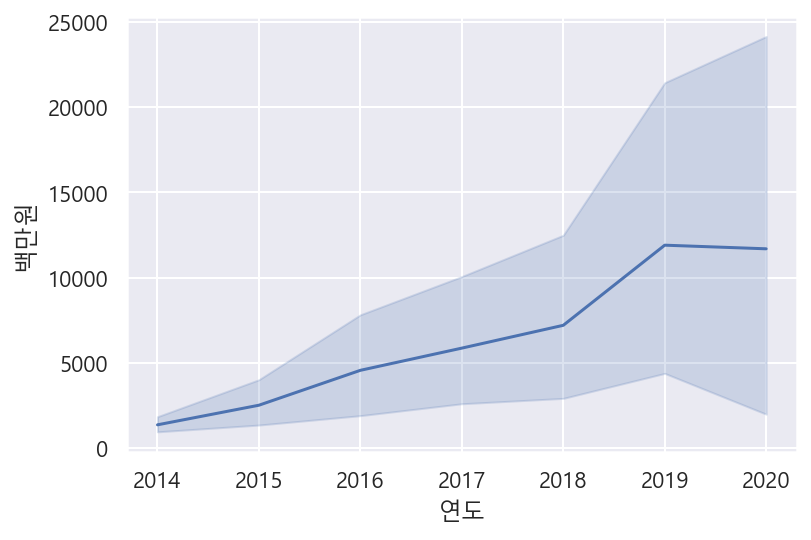

In [33]:
# 연도, 판매액을 lineplot으로 그리기
sns.lineplot(data=df_total, x='연도', y='백만원')

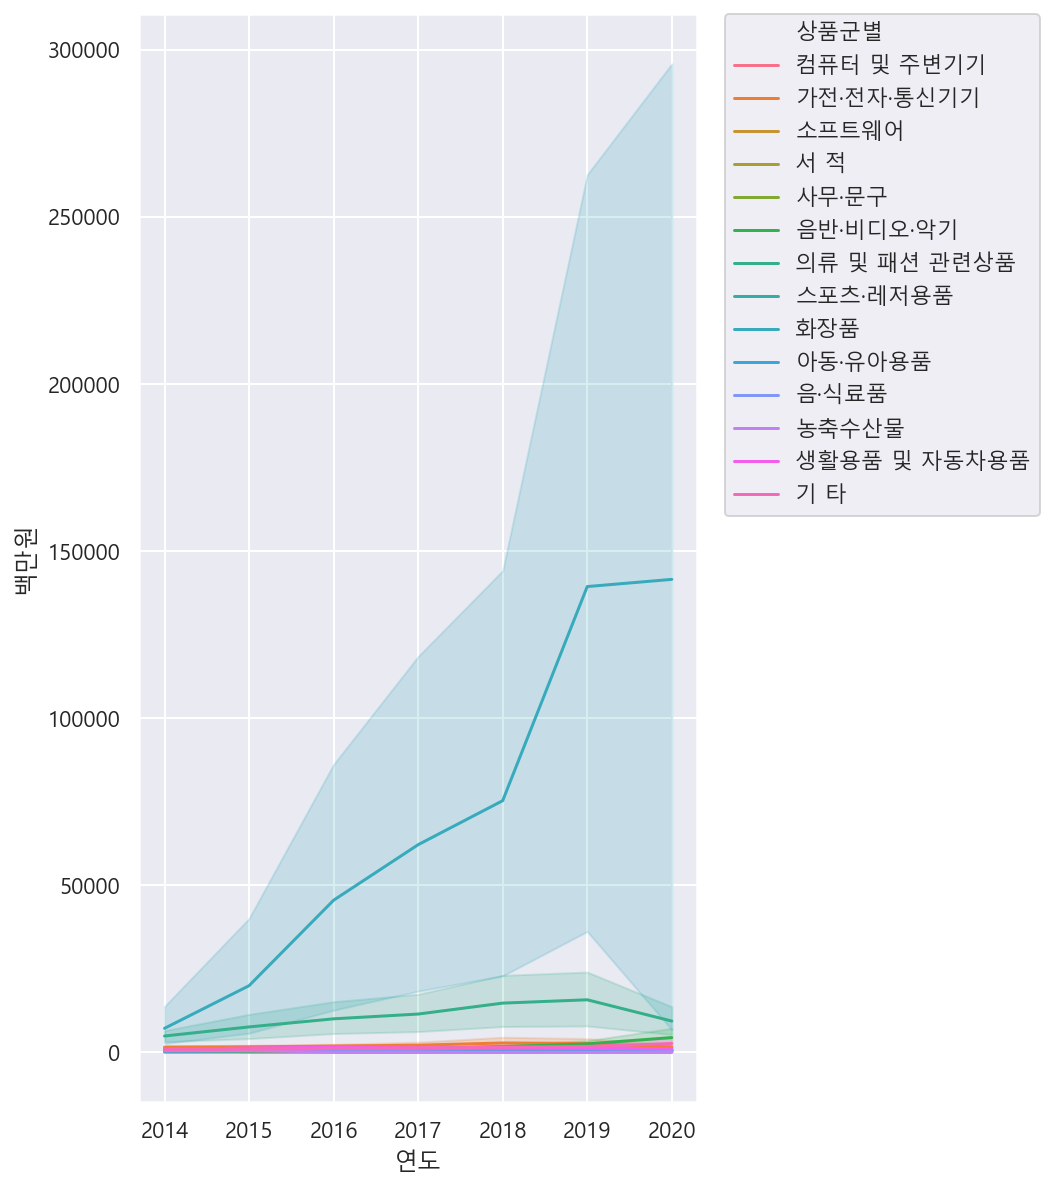

In [37]:
# 연도, 판매액을 lineplot으로 그리고 상품군별로 다른 색상으로 
plt.figure(figsize=(5,10))
sns.lineplot(data=df_total, x='연도', y='백만원', hue='상품군별')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

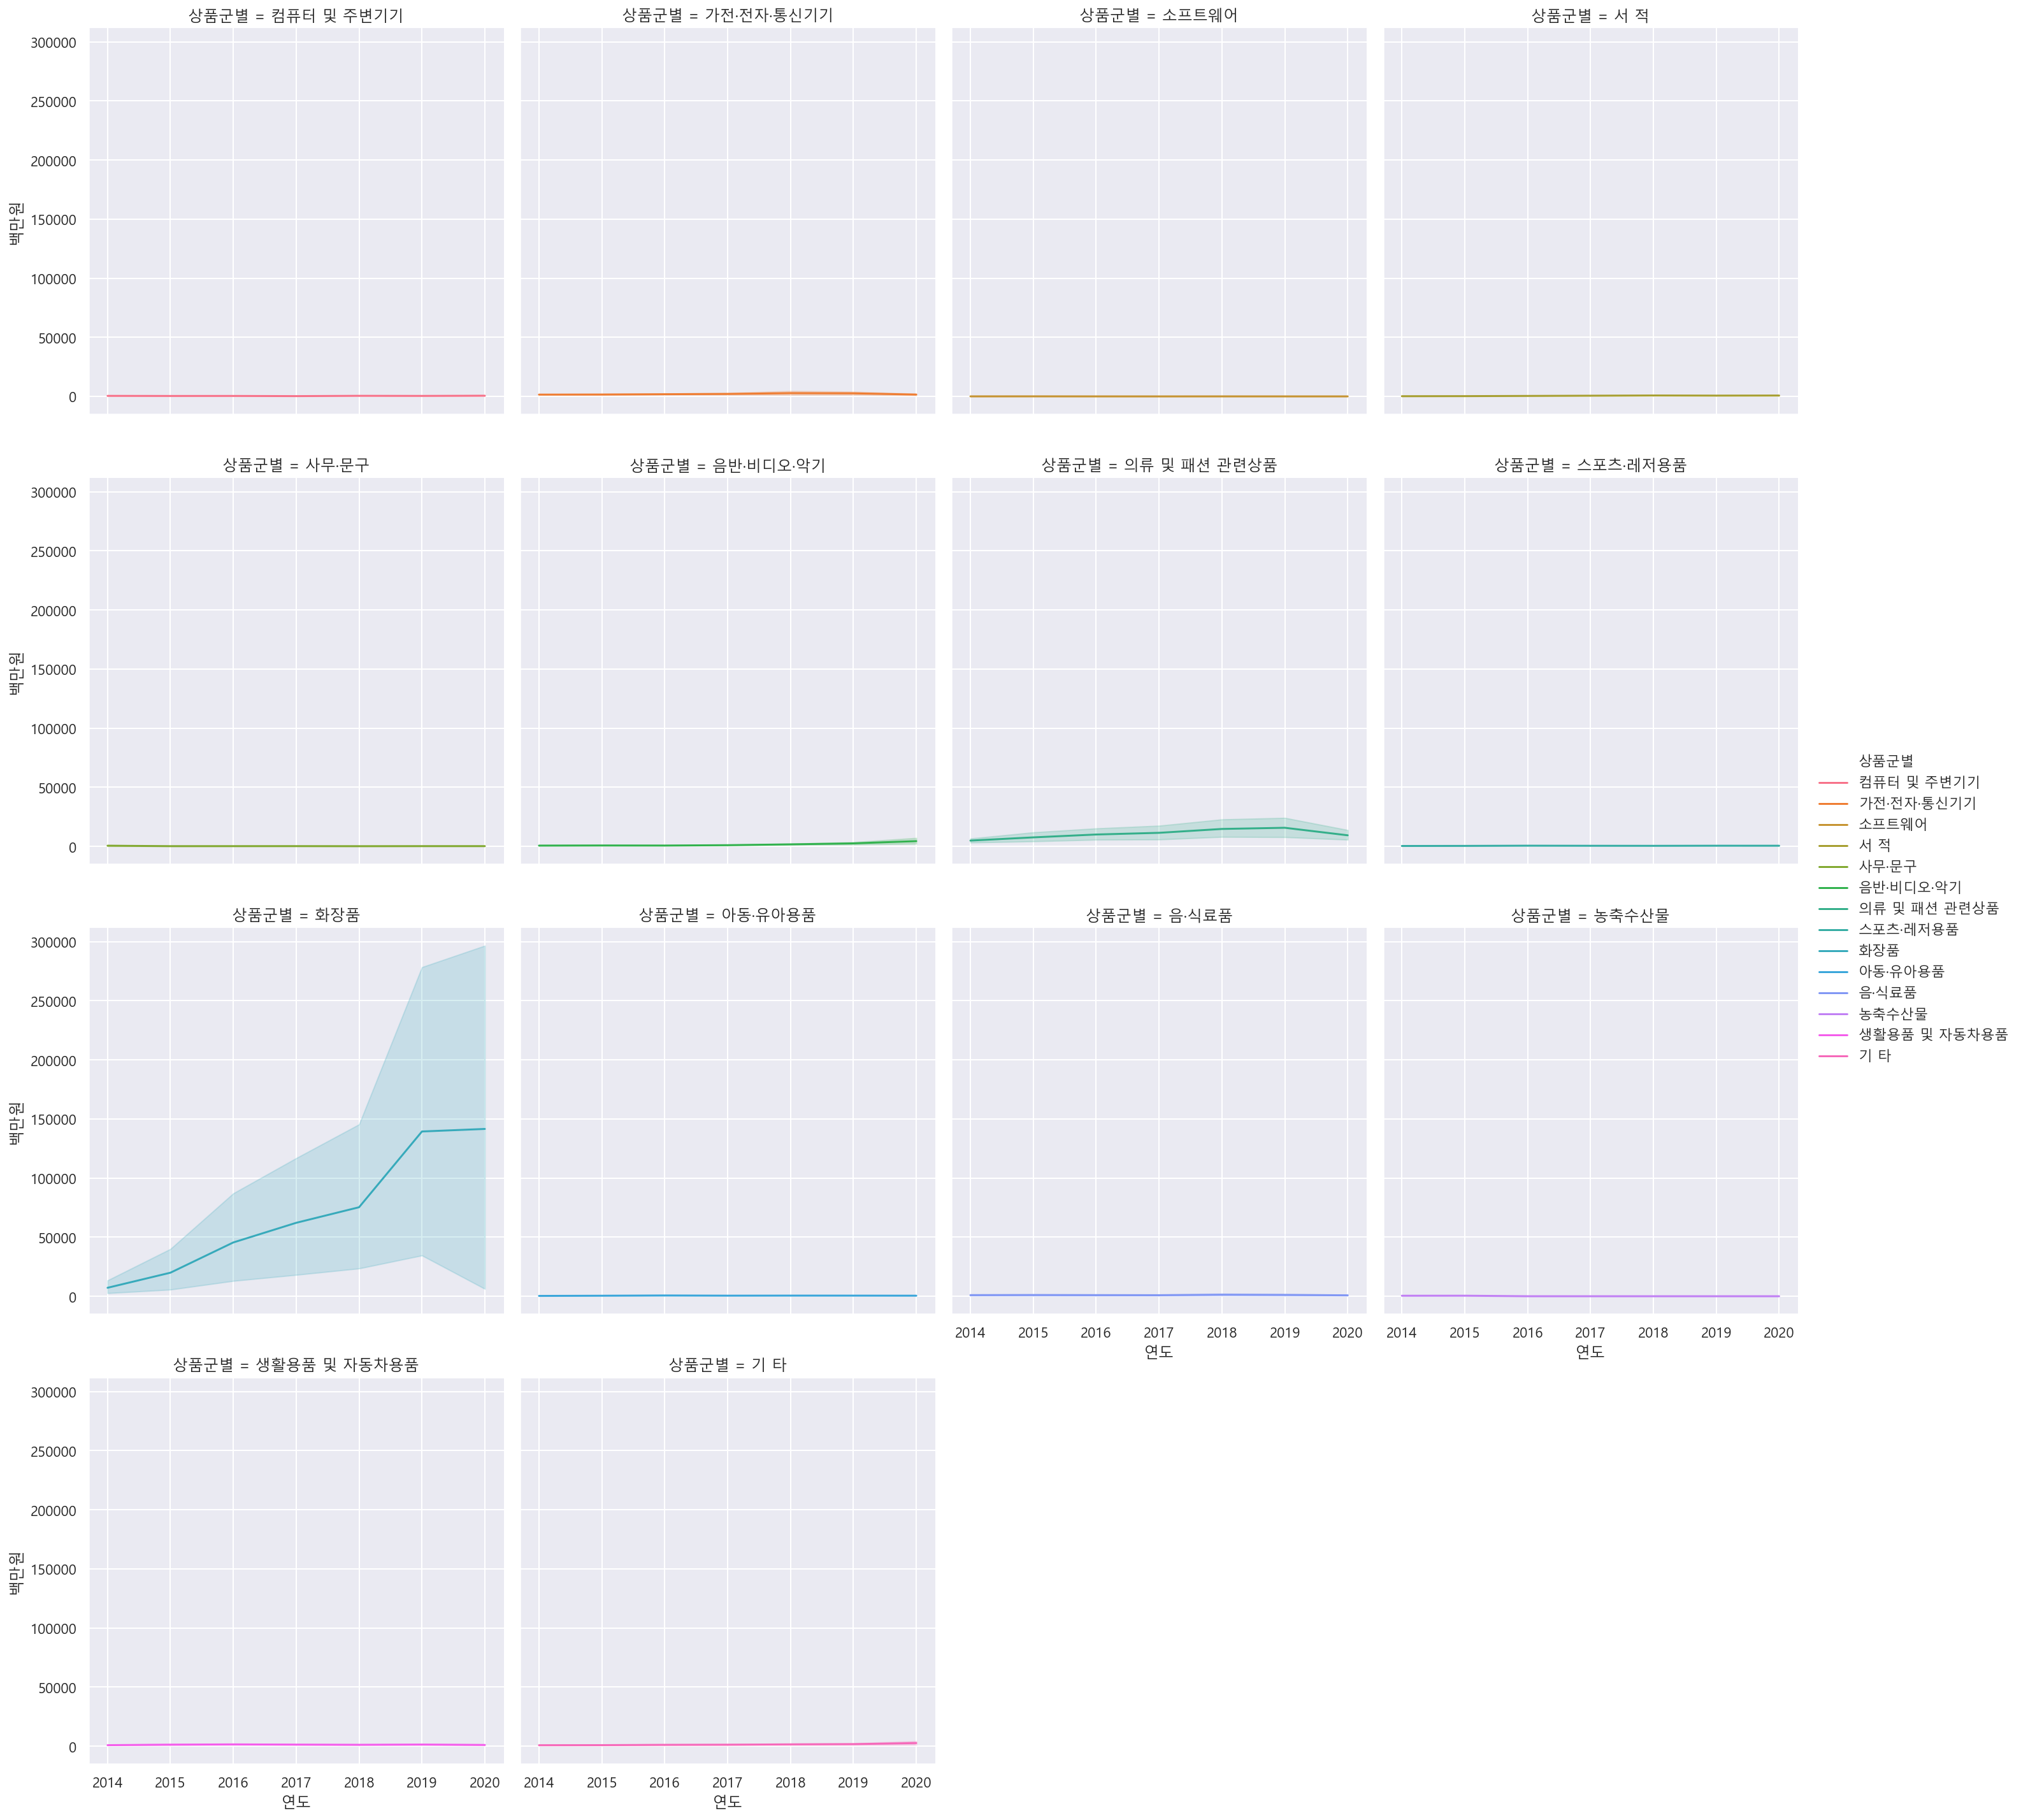

In [43]:
# 위에 그린 그래프를 자세히 보기 위해 서프플롯으로 표시하기
sns.relplot(data=df_total, x='연도', y='백만원', hue='상품군별', kind='line', col='상품군별', col_wrap=4)

In [47]:
# isin을 사용해 화장품만 표시
df_total[df_total['상품군별'].isin(['화장품'])]

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014 1/4,937.0,2014,1
...,...,...,...,...,...,...,...
11952,유럽연합(EU),화장품,계,2020 3/4 p),1946.0,2020,3
11997,중동,화장품,계,2020 3/4 p),543.0,2020,3
12042,중남미,화장품,계,2020 3/4 p),200.0,2020,3
12087,대양주,화장품,계,2020 3/4 p),614.0,2020,3


In [49]:
# isin을 사용해 화장품만 제외하고 df_sub라는 변수에 담는다.
df_sub = df_total[~df_total['상품군별'].isin(['화장품'])].copy()

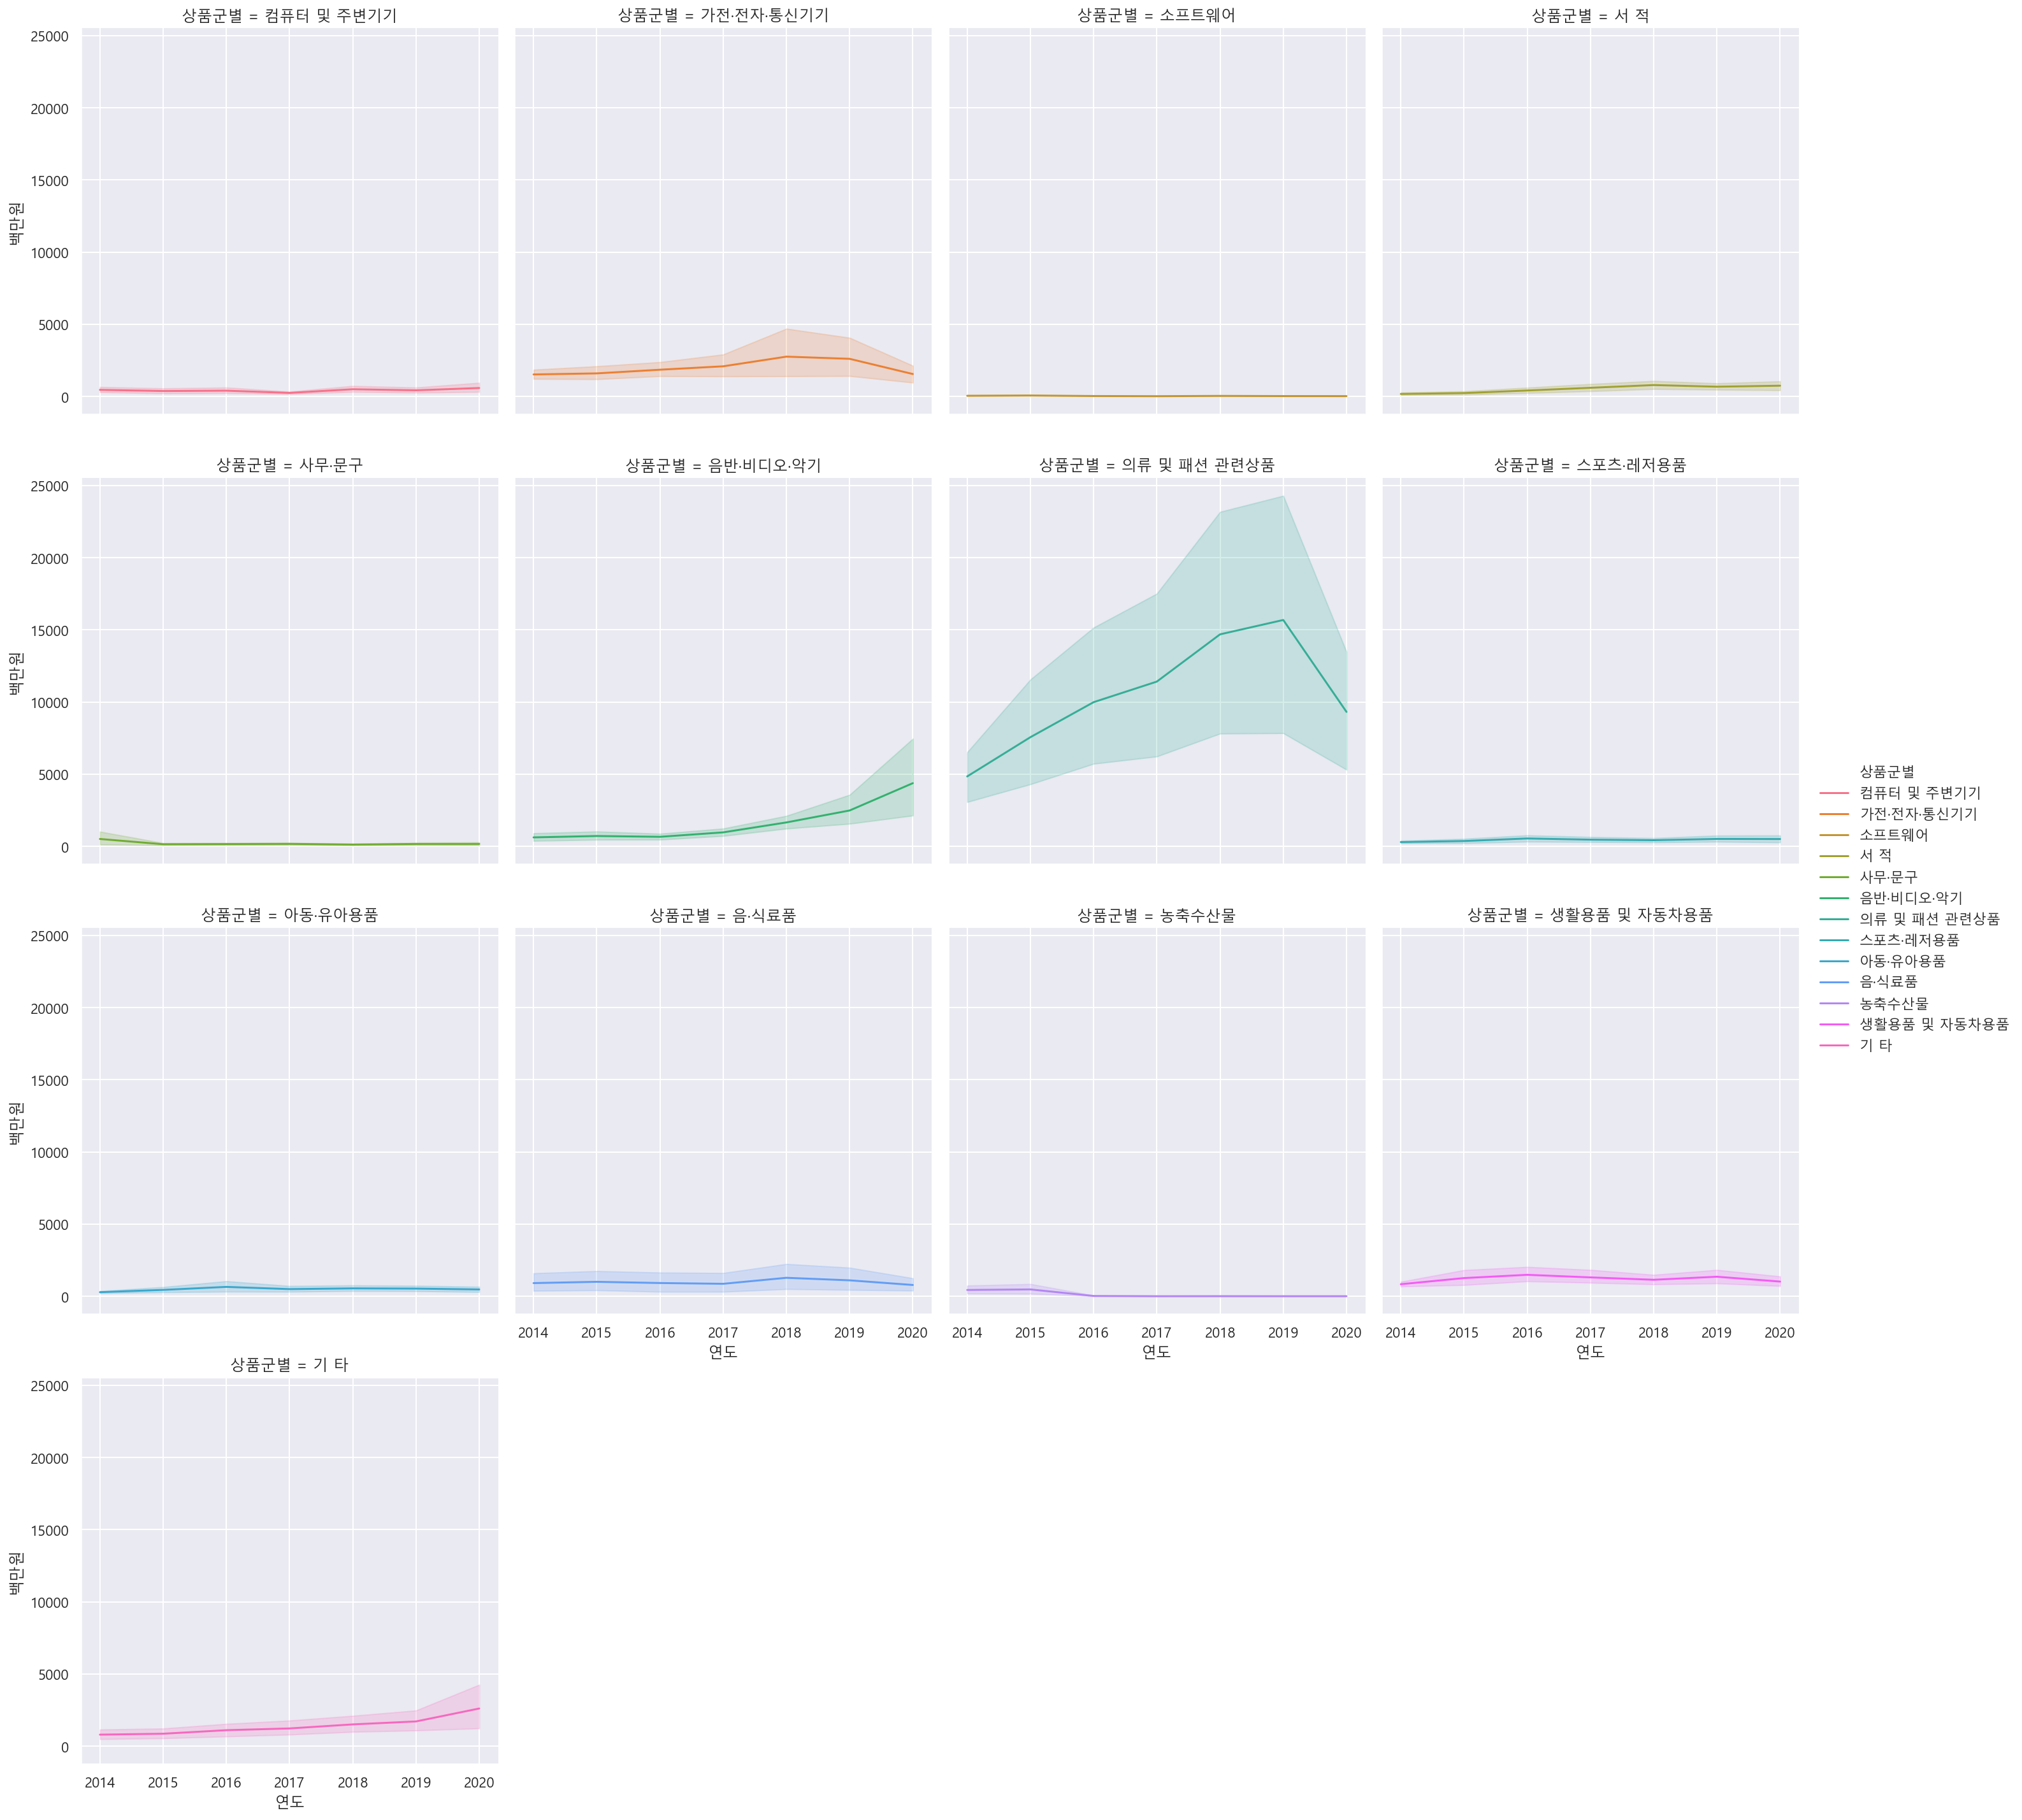

In [52]:
# 연도별 판매액을 상품군별로 relplot을 활용해 서브플롯으로 그리기
sns.relplot(data=df_sub, x='연도', y='백만원', hue='상품군별', col='상품군별', col_wrap=4, kind='line')

In [57]:
df_sub2 = df_total[~df_total['상품군별'].isin(['화장품', '의류 및 패션 관련상품'])].copy()

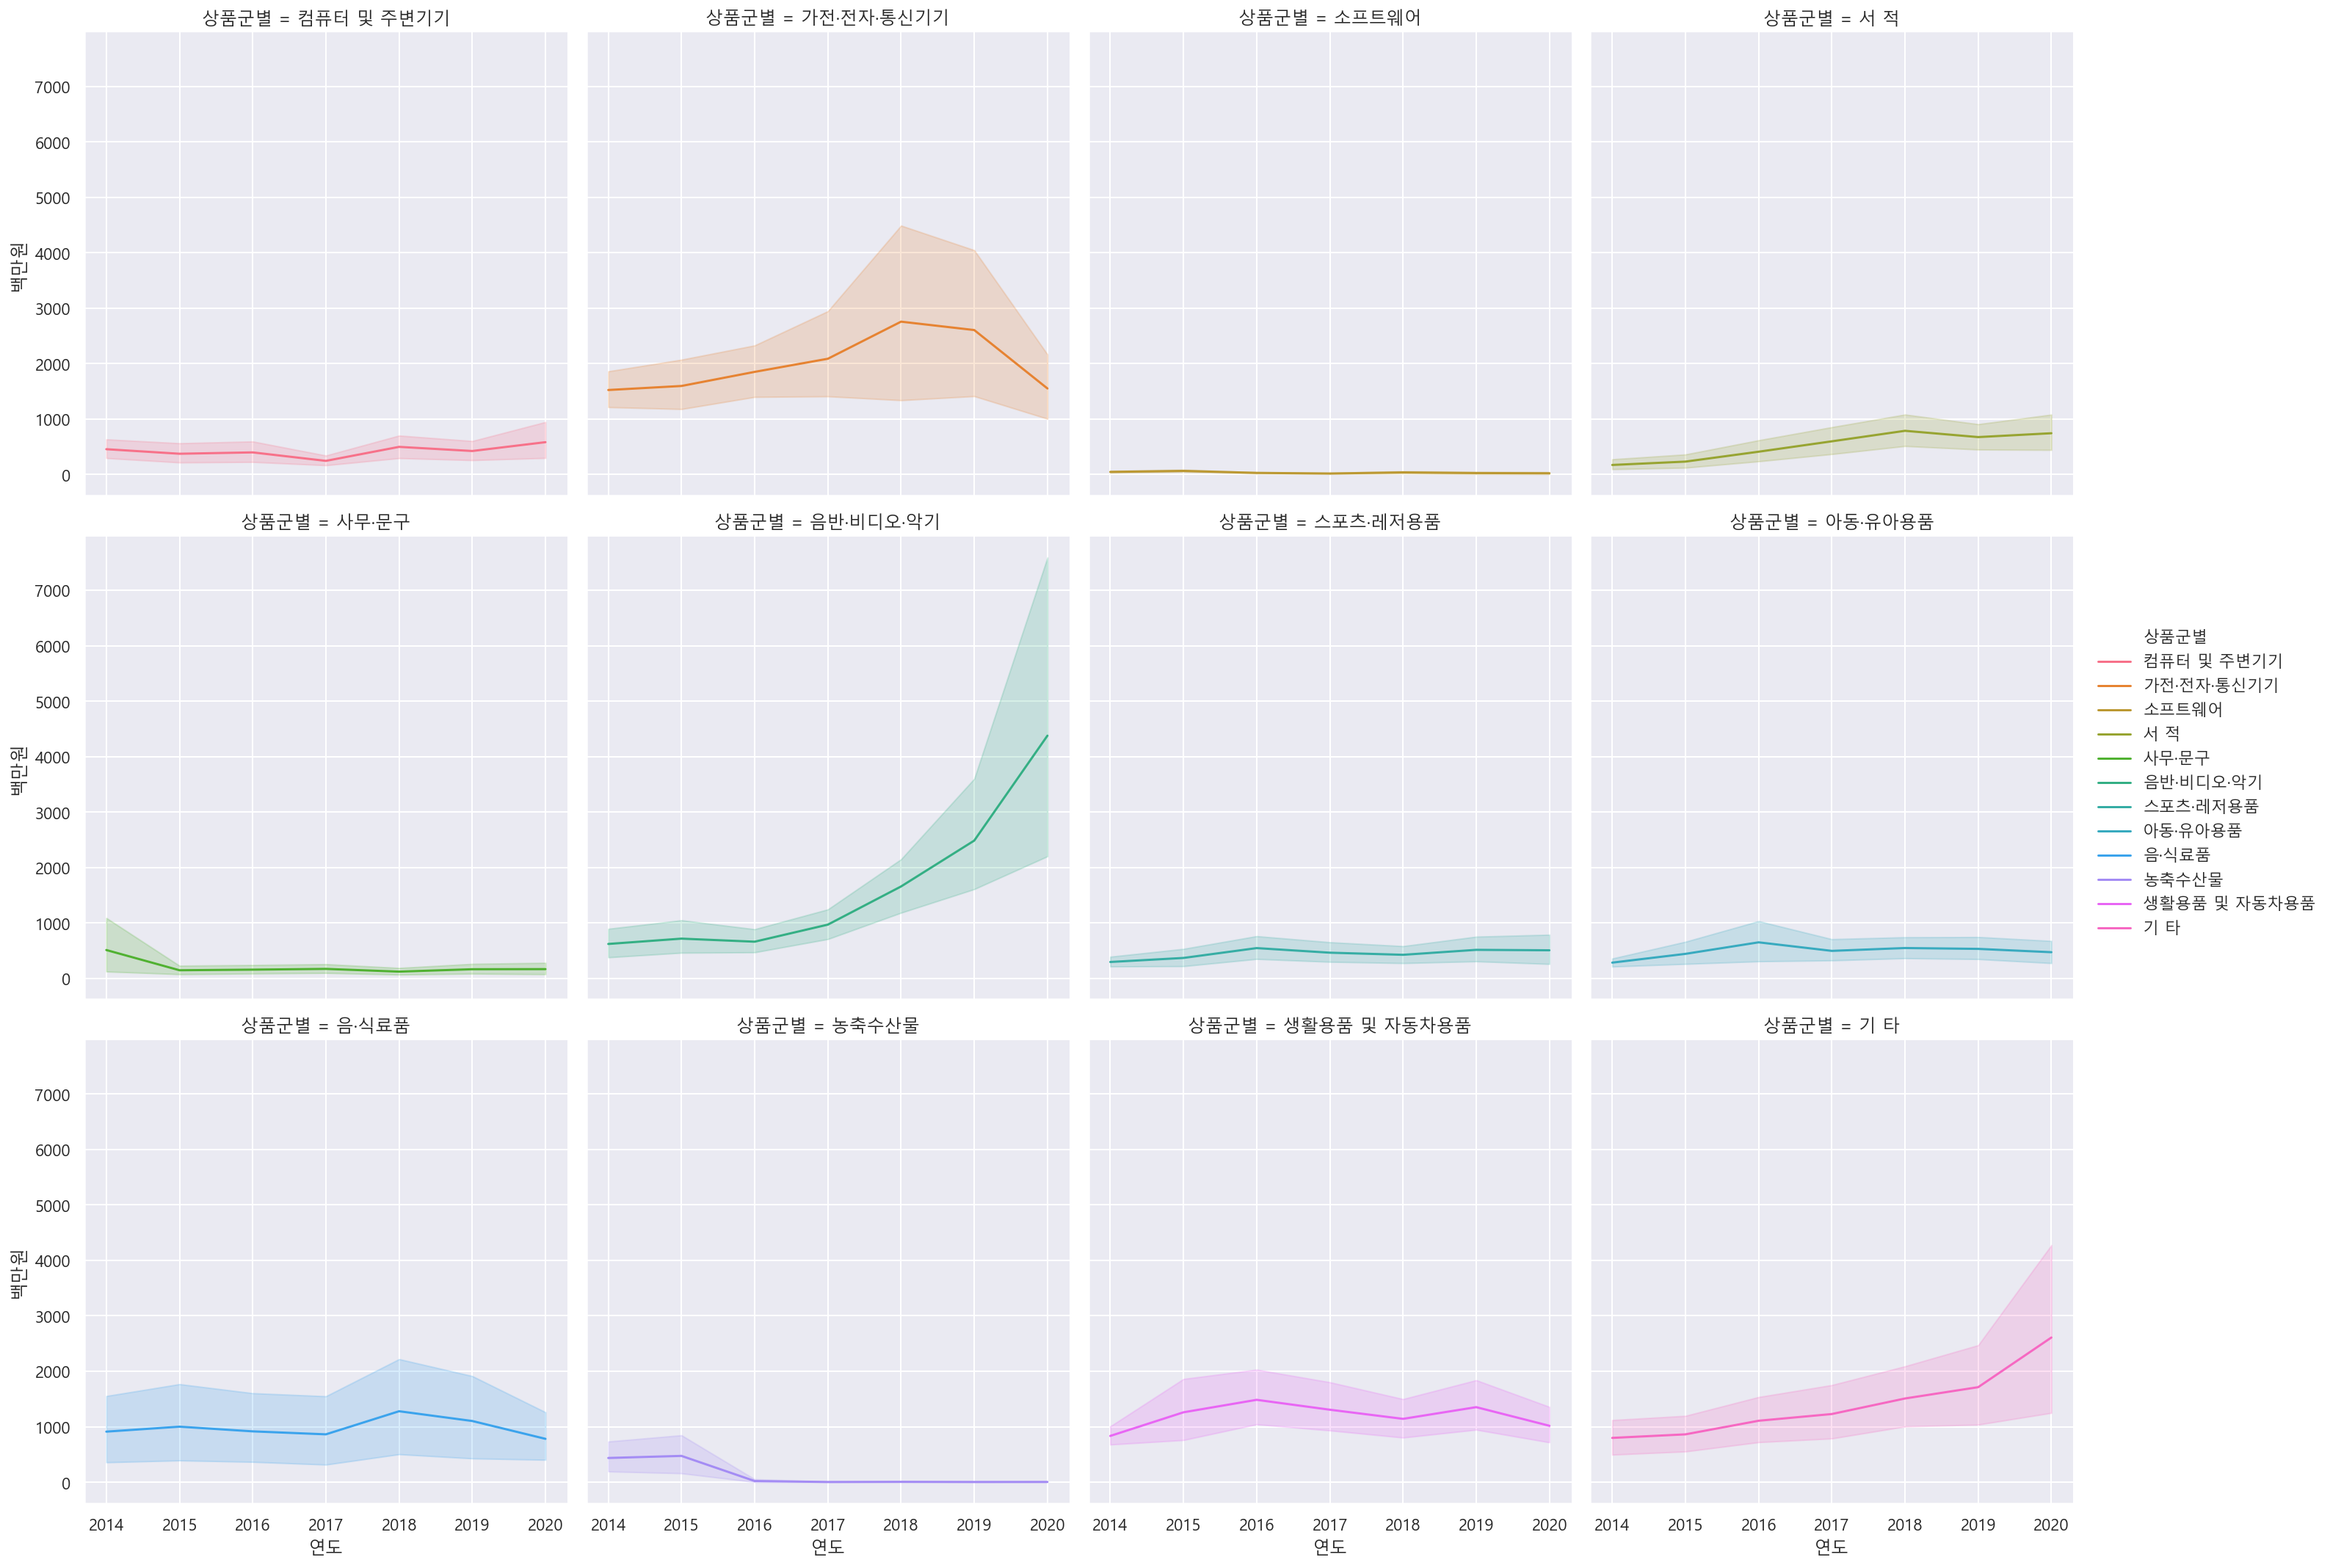

In [58]:
sns.relplot(data=df_sub2, x='연도', y='백만원', hue='상품군별', col='상품군별', col_wrap=4, kind='line')

화장품과 의류 및 패션 관련상품의 판매증가율이 크다.

## 6.2 화장품의 온라인쇼핑 해외직접판매액

- .copy() 사용하지 않으면?:
      df_cosmetic 데이터프레임의 열이나 값을 변경할 때 원본 데이터(df_total)에 영향을 줄 수 있으므로 .copy()를 반드시 사용하자

In [60]:
# df_cosmetic 변수에 상품군별 값이 화장품인 데이터만 가져오기
df_cosmetic = df_total[df_total['상품군별'] == '화장품'].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

In [68]:
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014 1/4,937.0,2014,1
...,...,...,...,...,...,...,...
11952,유럽연합(EU),화장품,계,2020 3/4 p),1946.0,2020,3
11997,중동,화장품,계,2020 3/4 p),543.0,2020,3
12042,중남미,화장품,계,2020 3/4 p),200.0,2020,3
12087,대양주,화장품,계,2020 3/4 p),614.0,2020,3


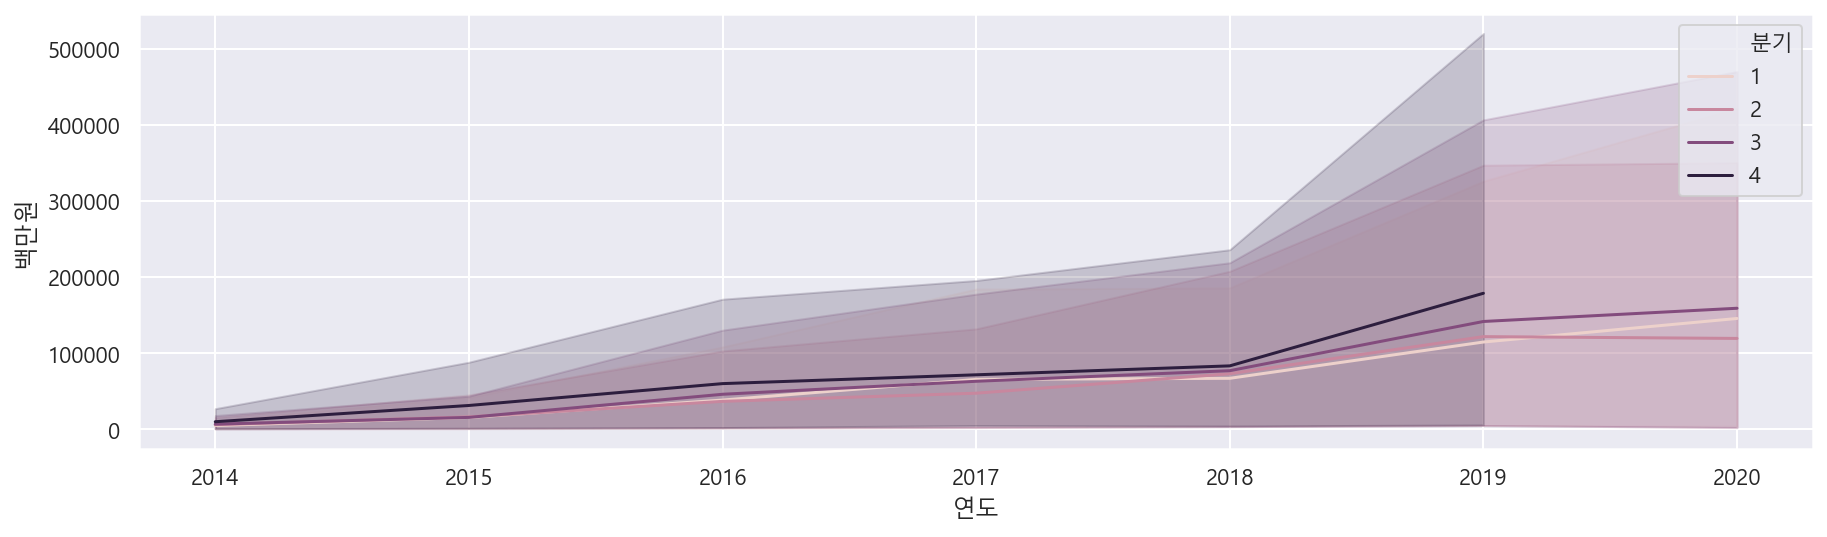

In [63]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현하기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic, x='연도', y='백만원', hue='분기')

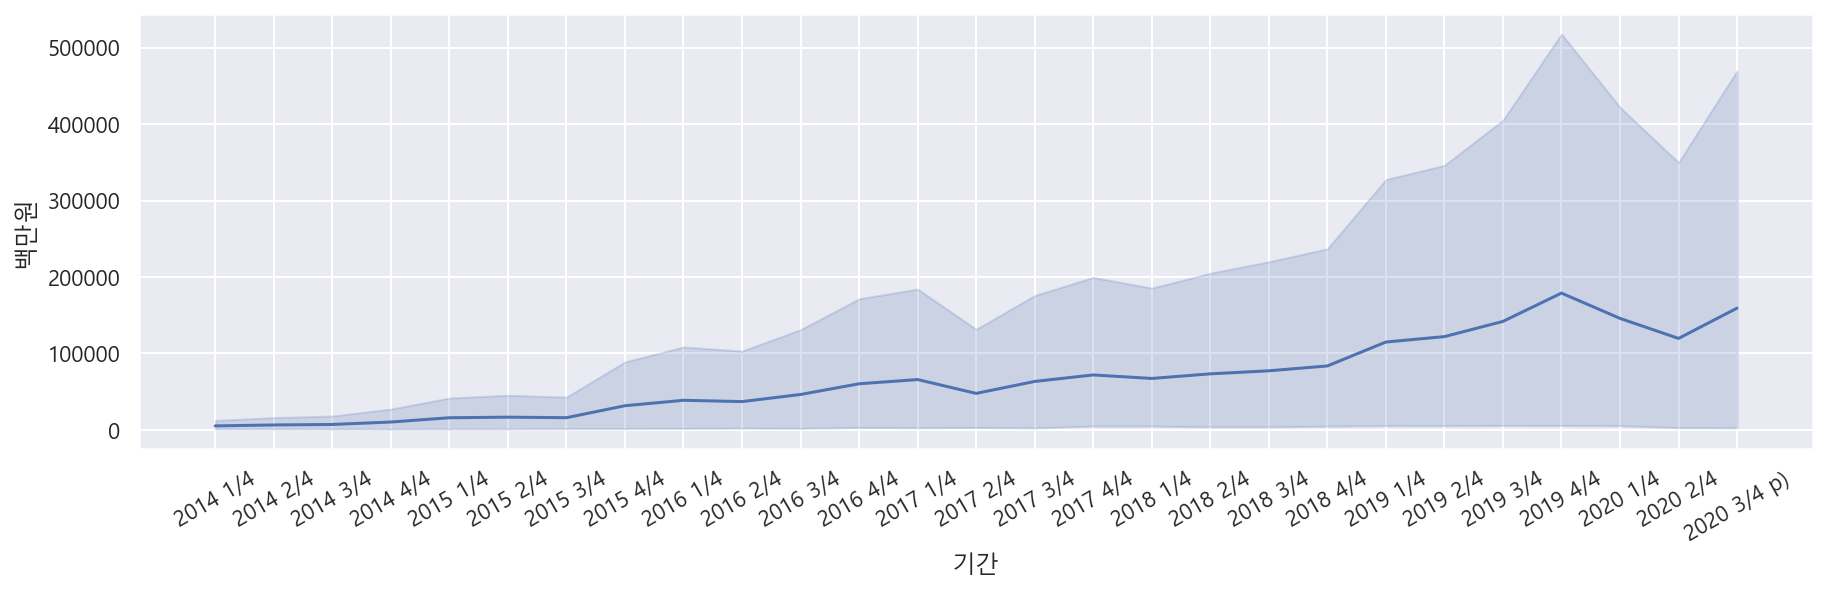

In [67]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원')

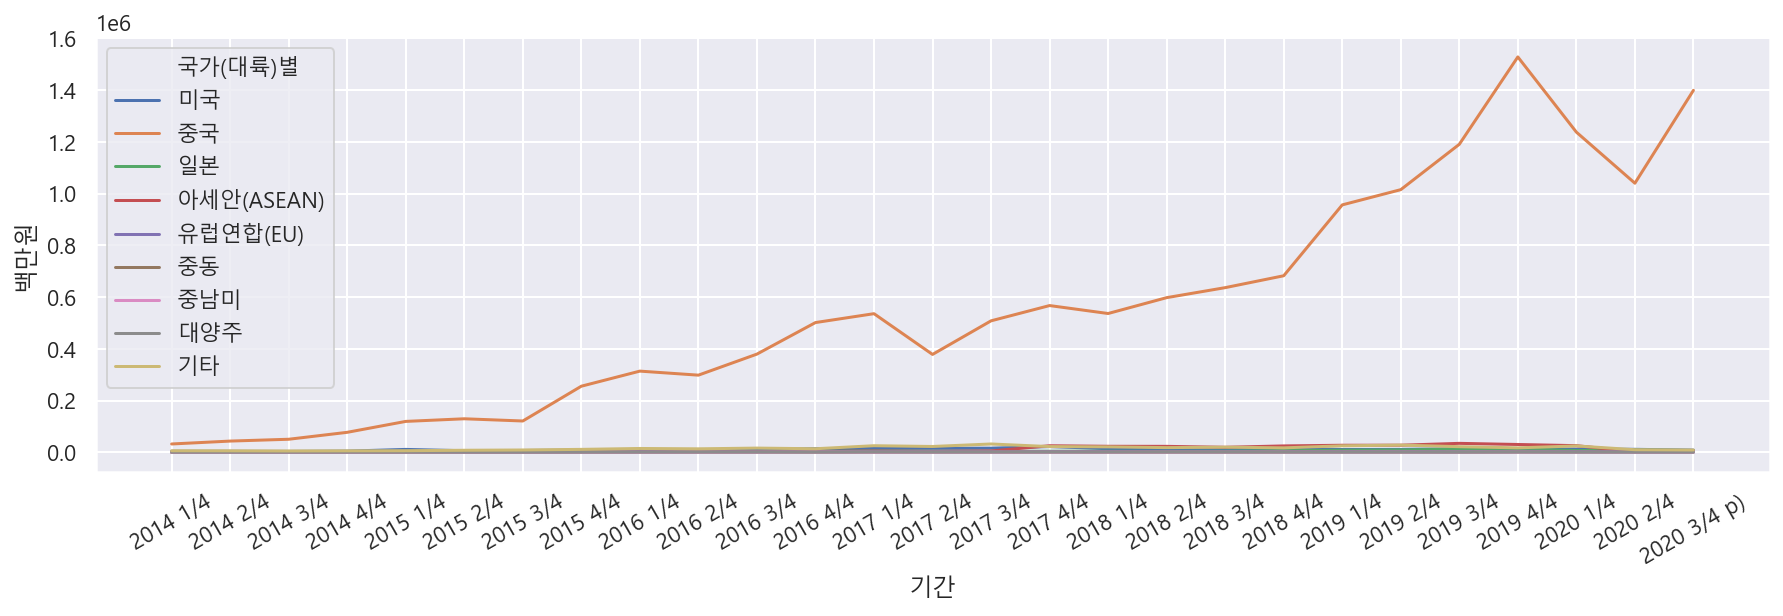

In [74]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 '국가(대륙)별'로 다른 색상으로 
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원', hue='국가(대륙)별')

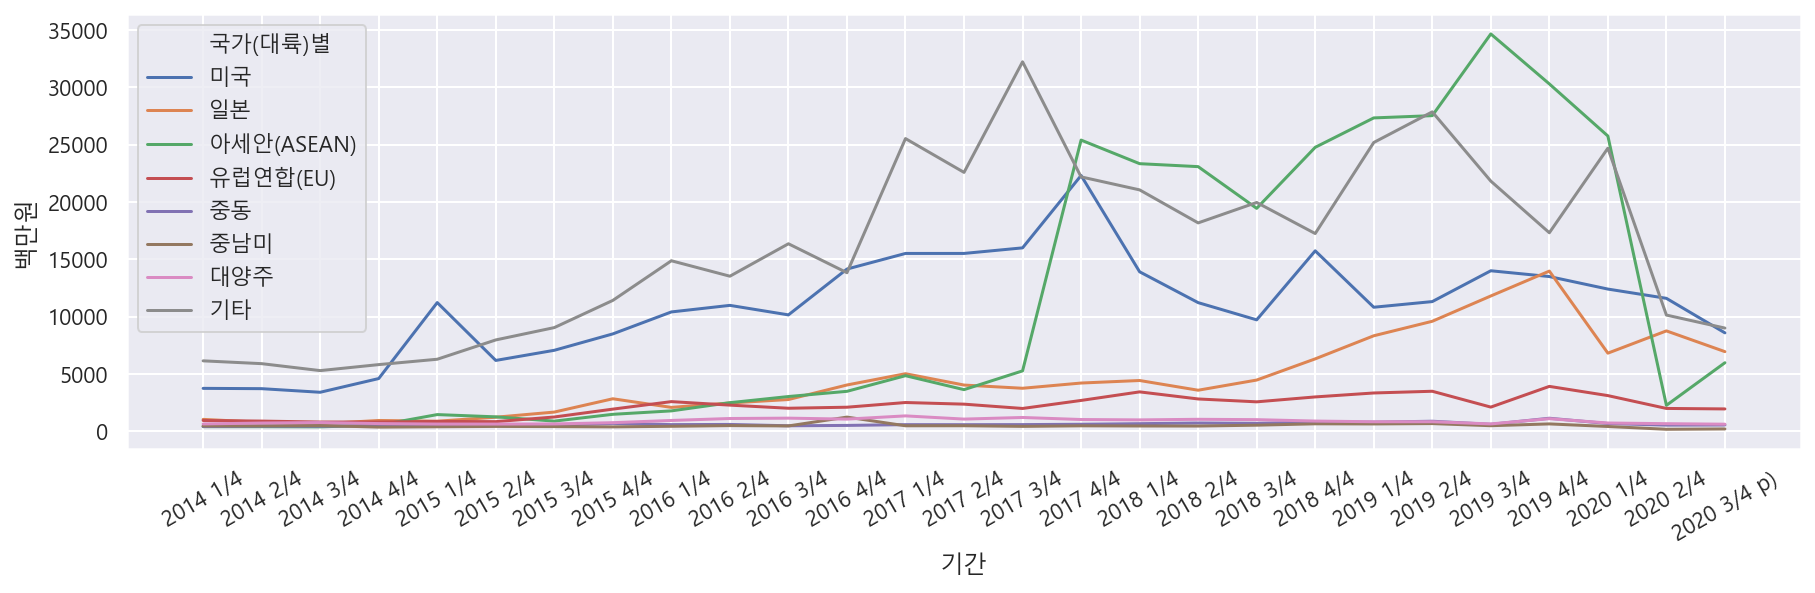

In [72]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 중국을 제외한'국가(대륙)별'로 다른 색상으로 표시하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별']!='중국'], x='기간', y='백만원', hue='국가(대륙)별')

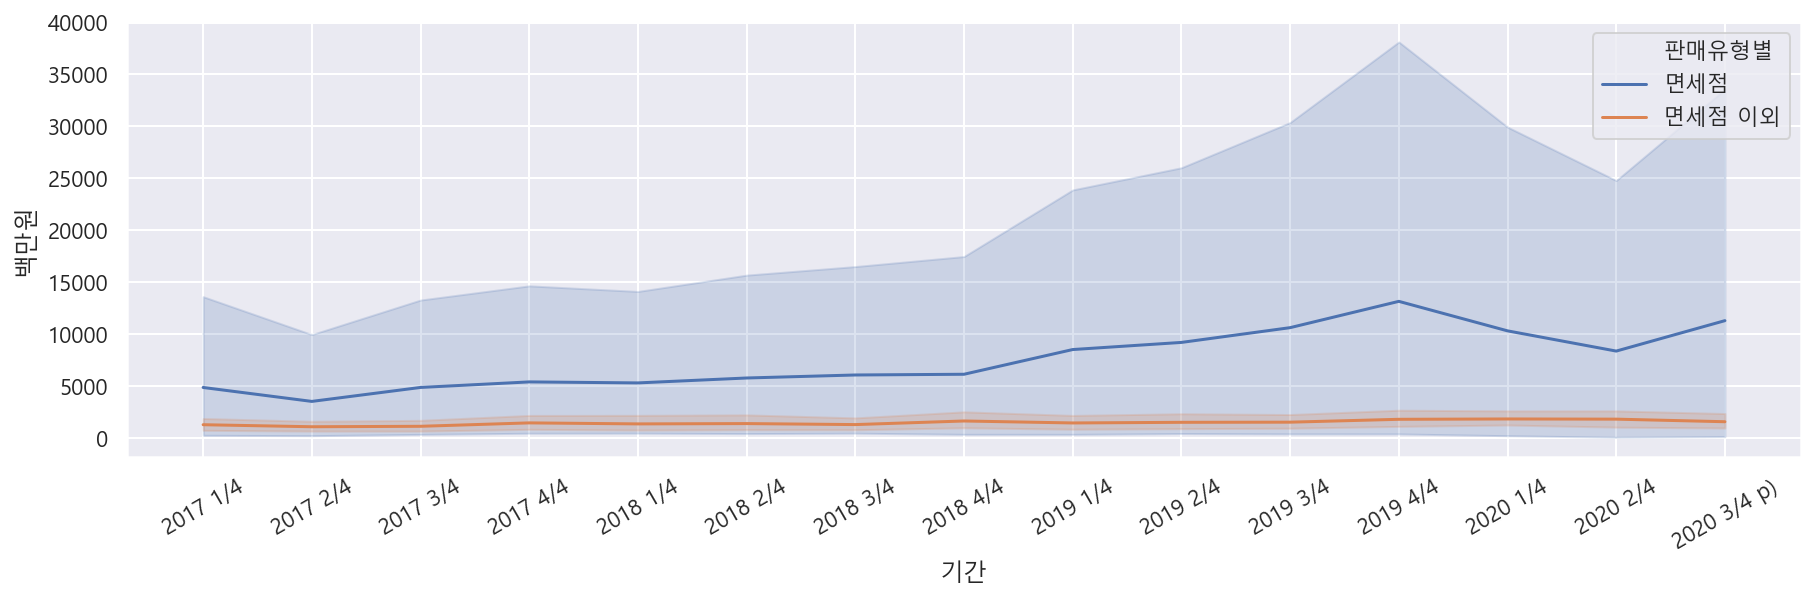

In [81]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 '판매유형별'로 다른 색상으로 표시하기
df_sub3 = df[df['판매유형별'] != '계'].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub3, x='기간', y='백만원', hue='판매유형별')

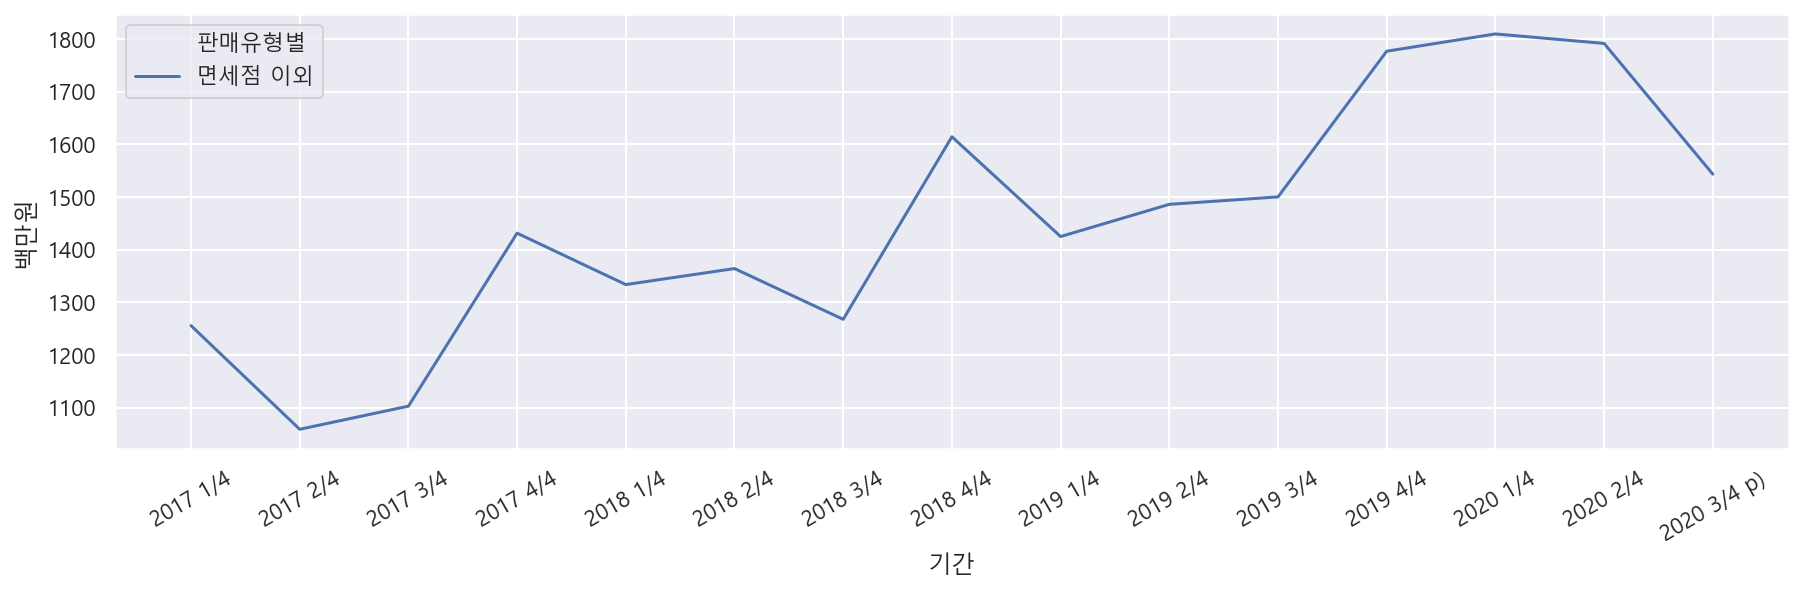

In [83]:
# 면세점 이외 화장품 판매액에 대한 기간별 금액 데이터 시각화하기
df_sub4 = df[(df['판매유형별'] != '계') & (df['판매유형별'] != '면세점')].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub4, x='기간', y='백만원', hue='판매유형별', ci=None)

## 6.3 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [87]:
# df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별']=='계')].copy()
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
11946,유럽연합(EU),의류 및 패션 관련상품,계,2020 3/4 p),1247.0,2020,3
11991,중동,의류 및 패션 관련상품,계,2020 3/4 p),538.0,2020,3
12036,중남미,의류 및 패션 관련상품,계,2020 3/4 p),141.0,2020,3
12081,대양주,의류 및 패션 관련상품,계,2020 3/4 p),979.0,2020,3


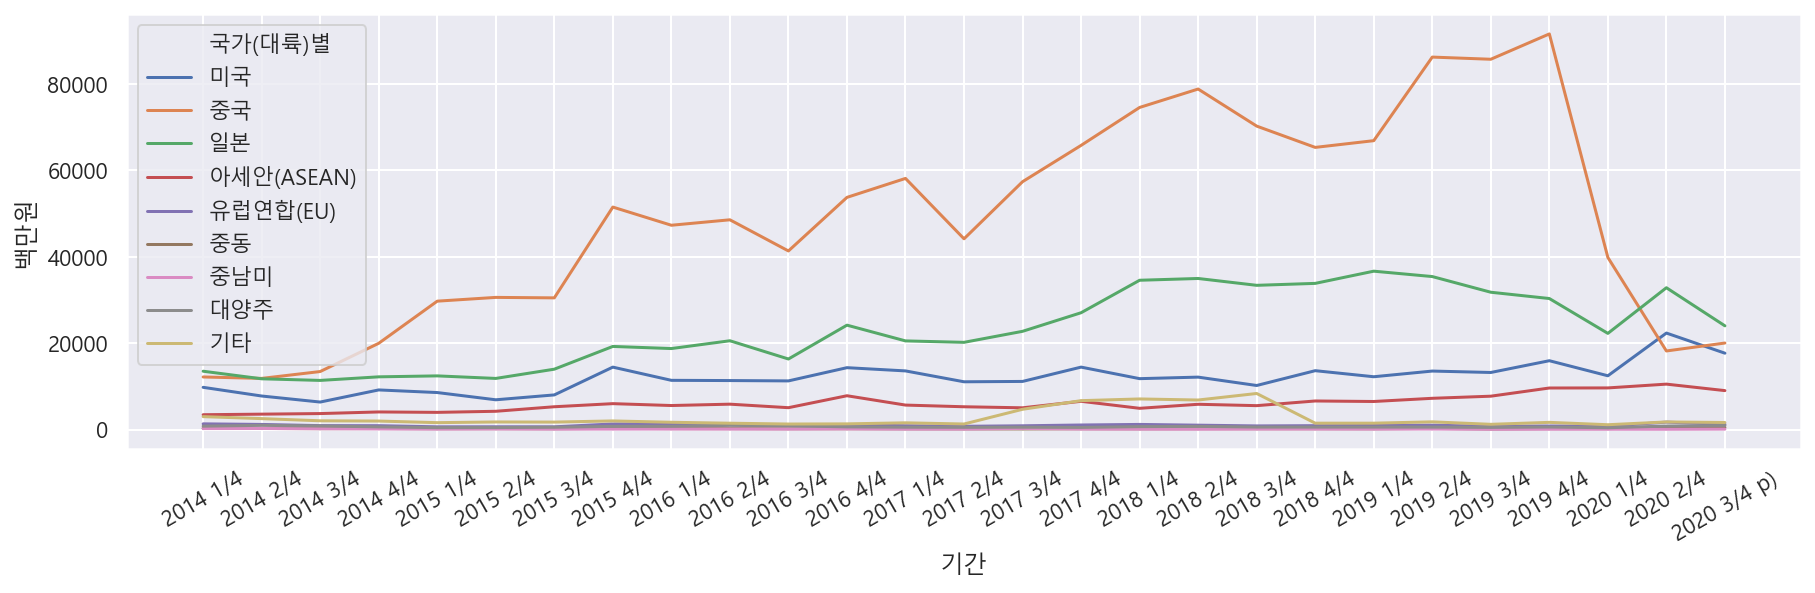

In [89]:
# 의류 및 패션관련 상품 판매액에 대한 기간별 금액 데이터 시각화하고
# 국가(대륙)별 로 다른 색상으로 표시하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간', y='백만원', hue='국가(대륙)별')

In [94]:
# df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아주기
df_fashion2 = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] !='계')].copy()
df_fashion2

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
67,미국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
68,미국,의류 및 패션 관련상품,면세점 이외,2014 1/4,NaN,2014,1
112,중국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
113,중국,의류 및 패션 관련상품,면세점 이외,2014 1/4,NaN,2014,1
157,일본,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
12038,중남미,의류 및 패션 관련상품,면세점 이외,2020 3/4 p),141.0,2020,3
12082,대양주,의류 및 패션 관련상품,면세점,2020 3/4 p),1.0,2020,3
12083,대양주,의류 및 패션 관련상품,면세점 이외,2020 3/4 p),978.0,2020,3
12127,기타,의류 및 패션 관련상품,면세점,2020 3/4 p),3.0,2020,3


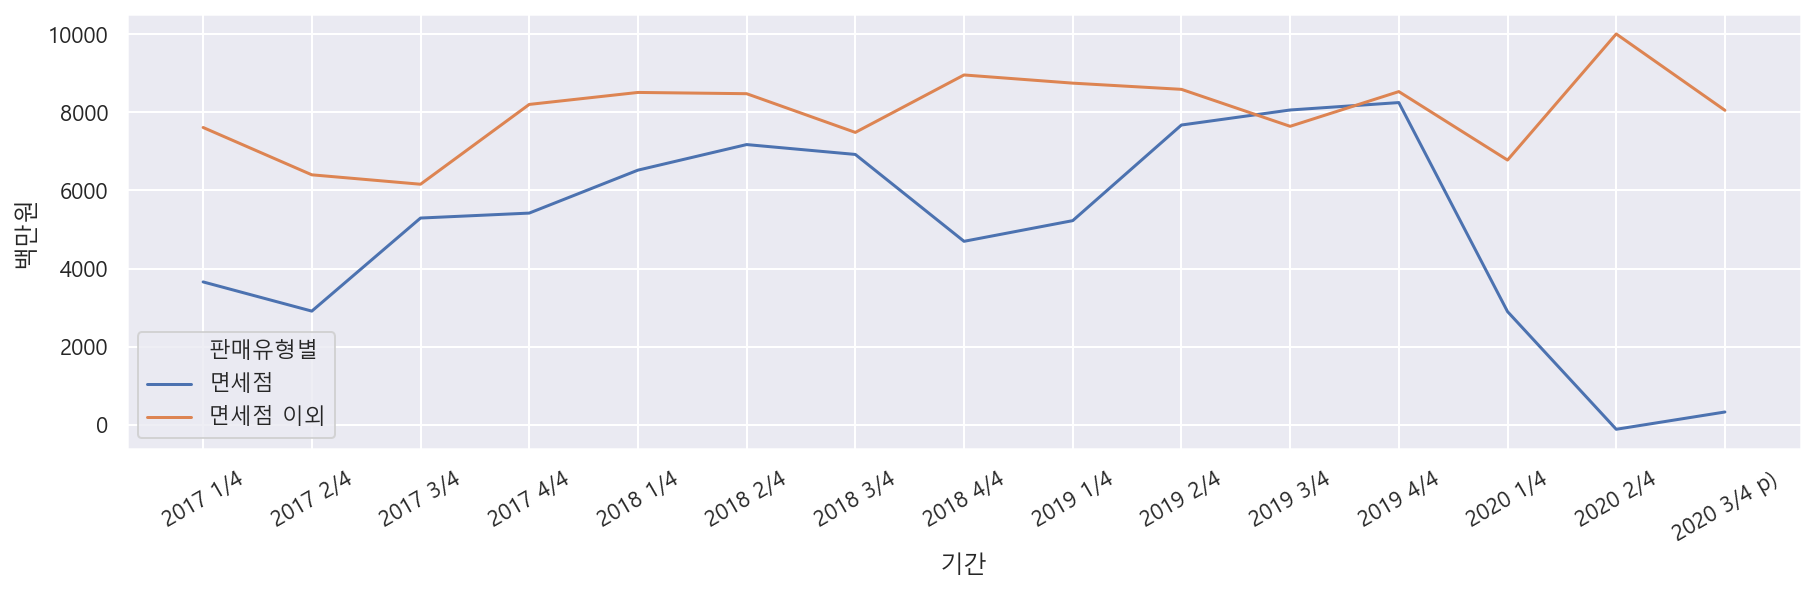

In [96]:
# 의류 및 패션관련 상품 판매액에 대한 기간별 금액 데이터 시각화하고
# 판매유형별 로 다른 색상으로 표시하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x='기간', y='백만원', hue='판매유형별', ci=None)

코로나 유행(2020 1/4분기) 이후 면세점의 화장품 해외판매액이 크게 감소한 것으로 보인다.

## 6.4 데이터 집계하기

In [105]:
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
11946,유럽연합(EU),의류 및 패션 관련상품,계,2020 3/4 p),1247.0,2020,3
11991,중동,의류 및 패션 관련상품,계,2020 3/4 p),538.0,2020,3
12036,중남미,의류 및 패션 관련상품,계,2020 3/4 p),141.0,2020,3
12081,대양주,의류 및 패션 관련상품,계,2020 3/4 p),979.0,2020,3


In [104]:
df_fashion['판매유형별'].value_counts()

계    243
Name: 판매유형별, dtype: int64

In [98]:
# 피봇 테이블로 '국가(대륙)별', '연도 별' 합계 금액을 표 형태로 구하기
df_fashion.pivot_table?

In [101]:
# 국가(대륙)별 평균 판매액
df_fashion.pivot_table(index='국가(대륙)별', columns='연도', values='백만원')

연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
기타,2420.75,1812.00,1479.50,3596.75,5975.25,1577.25,1546.000000
대양주,848.00,587.25,850.25,566.50,681.25,596.75,764.000000
미국,8305.75,9516.50,12112.75,12588.25,11968.75,13758.75,17513.666667
아세안(ASEAN),3734.00,4909.75,6119.50,5667.75,5767.00,7804.25,9757.000000
유럽연합(EU),1121.25,843.50,1224.75,934.00,1028.50,923.50,1274.000000
일본,12240.00,14398.50,19976.25,22646.00,34200.00,33560.75,26385.000000
중국,14382.75,35584.75,47733.00,56351.75,72212.00,82563.50,26038.666667
중남미,243.75,154.00,162.25,190.50,144.00,135.75,120.333333
중동,293.00,254.50,242.00,193.00,219.75,231.00,445.000000


In [106]:
# 국가(대륙)별 총 판매액
result = df_fashion.pivot_table(index='국가(대륙)별', columns='연도', values='백만원', aggfunc='sum')
result

연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0,4638.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0,2292.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0,52541.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0,29271.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,3822.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0,79155.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0,78116.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0,361.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0,1335.0


## 6.5 연산결과를 시각적으로 보기

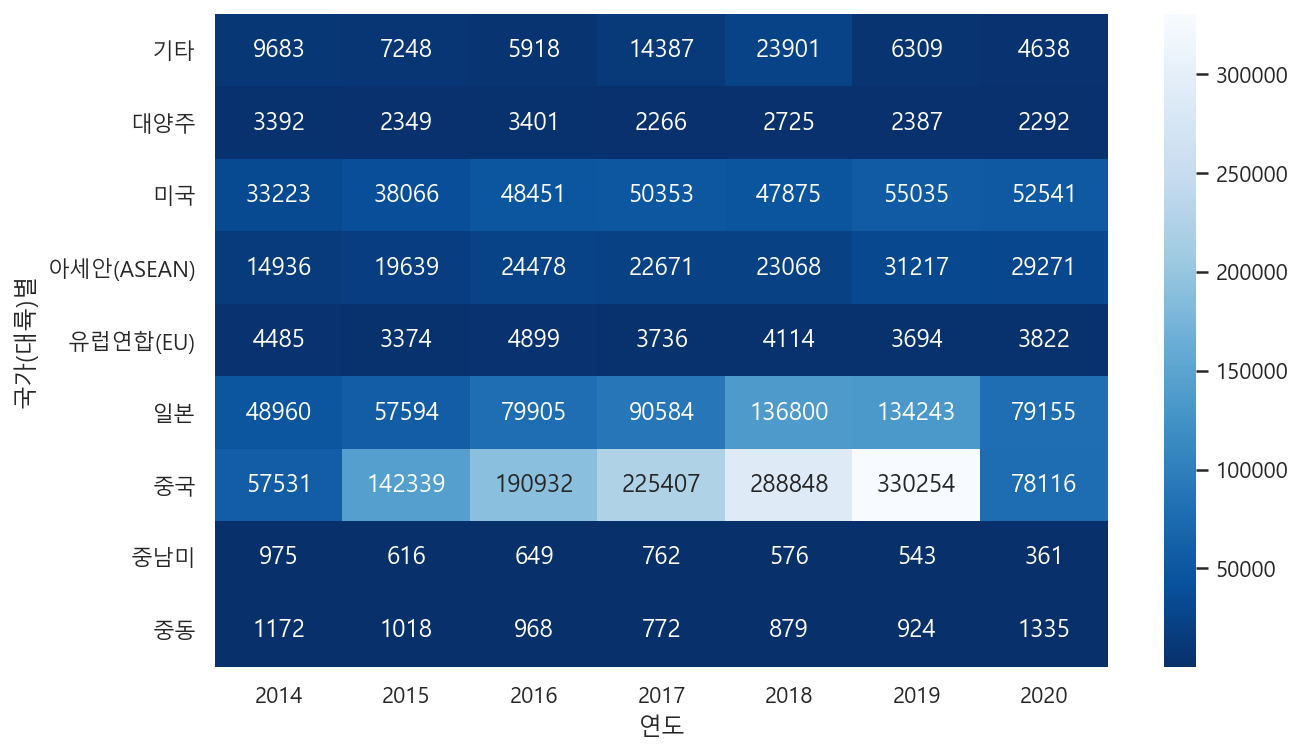

In [115]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기
# cmap=Blues_r : 색반전
plt.figure(figsize=(10,6))
sns.heatmap(result, cmap='Blues_r', annot=True, fmt='.0f')

# 7. 전체 상품군별로 온라인 쇼핑 해외판매액은 증가했을까?
- 온라인 쇼핑 해외판매액은 증가하다가 2020년 코로나 유행으로 그 증가율이 꺾였다.

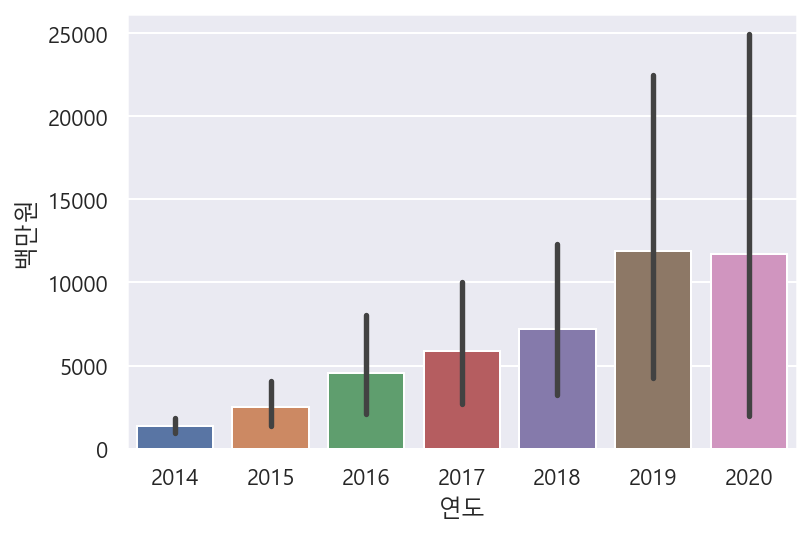

In [119]:
# 판매유형별 데이터의 '계'만 모은 df_total 변수를 통해 연도별 합계 금액을 시각화하기
sns.barplot(data=df_total, x='연도', y='백만원')

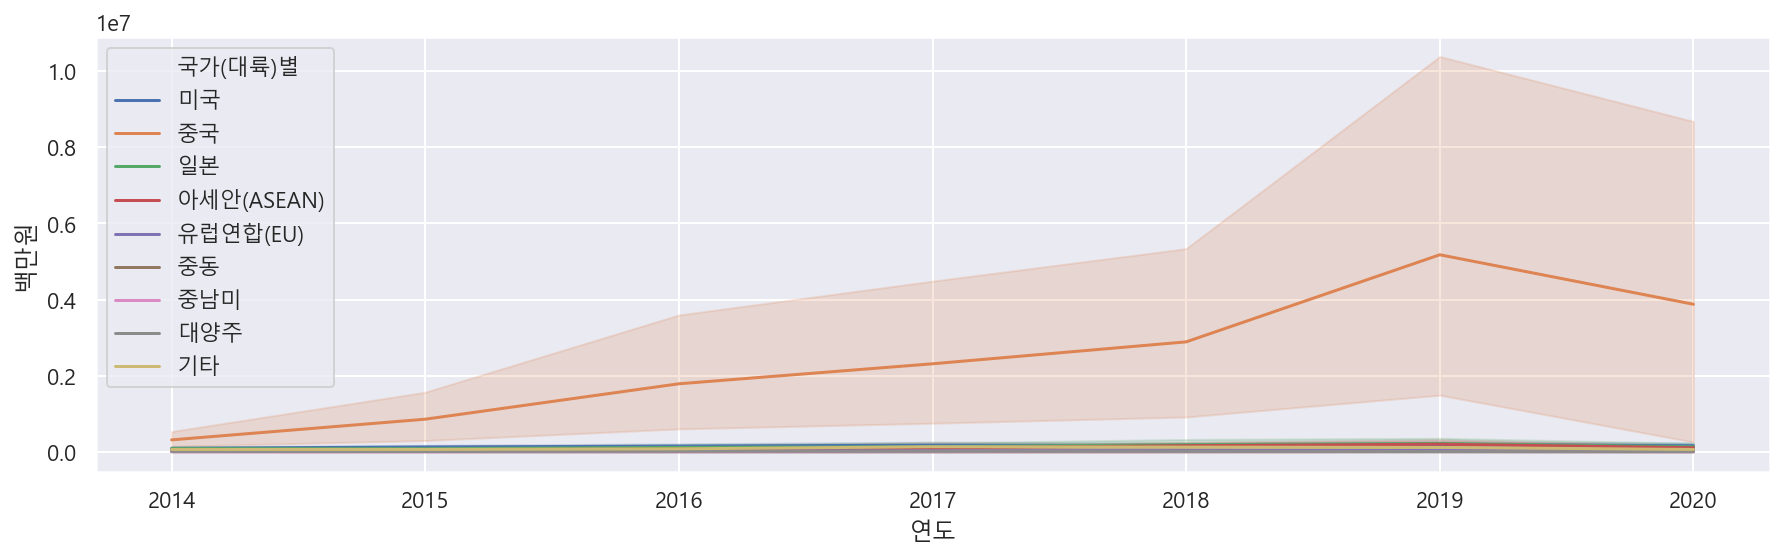

In [124]:
# 연도별 판매액을 그리고 '국가(대륙)별'로 다른 색상으로 표현하기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x='연도', y='백만원', hue='국가(대륙)별', estimator='sum')

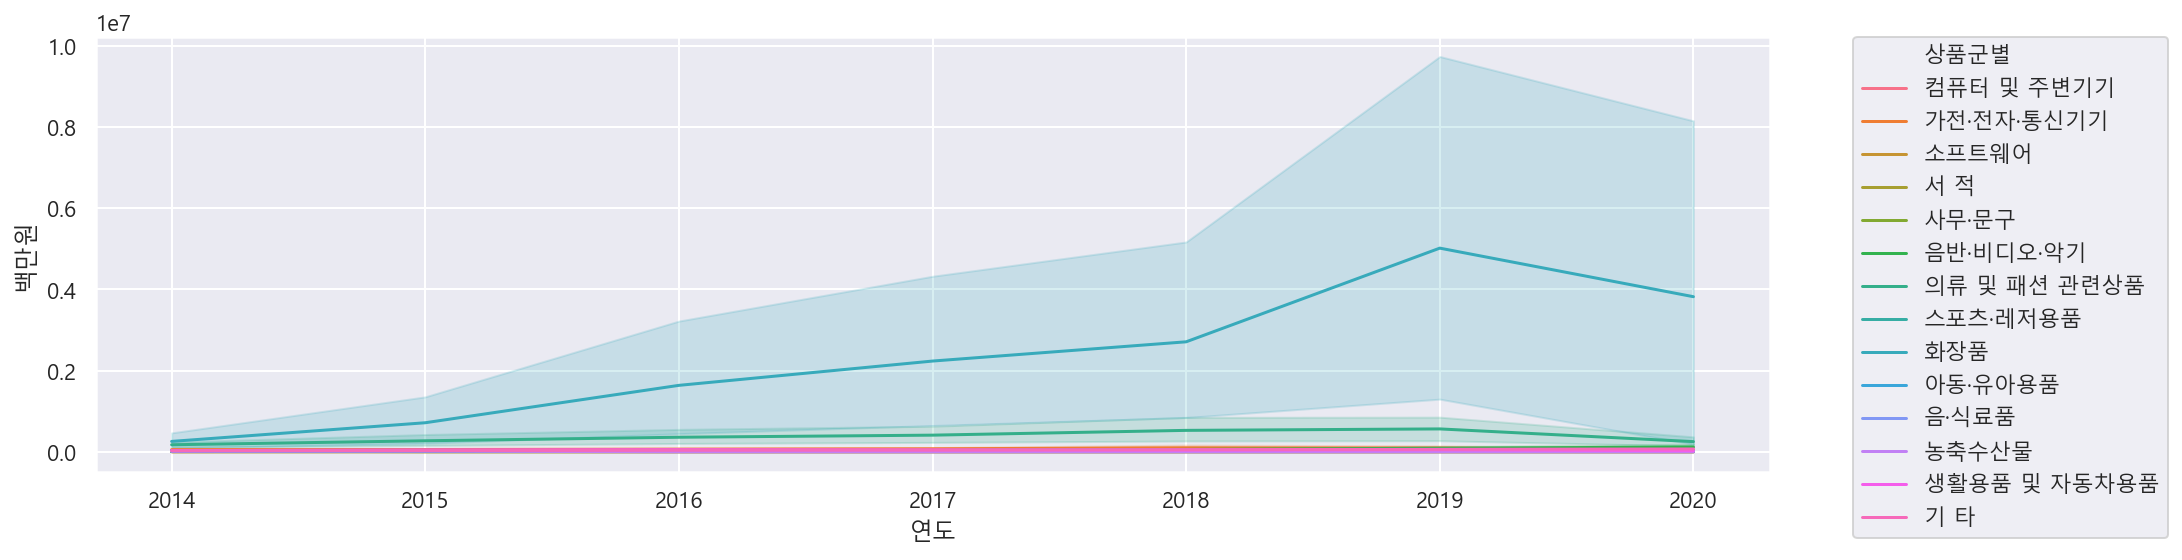

In [133]:
# 연도별 판매액을 그리고 '상품군별'로 다른 색상으로 표현하기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x='연도', y='백만원', hue='상품군별', estimator='sum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

범례 그리는 방법 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

# .copy()를 사용하지 않는다면?

In [140]:
df = pd.DataFrame({"A":[1,4,7], "B":[2,5,8], "C":[3,6,9]})
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [141]:
df_new = df
df_new

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [142]:
df_new['A'] = df['B'] + df['C']
df_new['A']

0     5
1    11
2    17
Name: A, dtype: int64

In [143]:
df_new

,A,B,C
0,5,2,3
1,11,5,6
2,17,8,9


In [144]:
df_new['C'] = df['A'] + df['B']
df_new['C']

0     7
1    16
2    25
Name: C, dtype: int64

In [145]:
df_new

,A,B,C
0,5,2,7
1,11,5,16
2,17,8,25


원본 데이터의 값도 바뀌어 버린다....

In [146]:
df

,A,B,C
0,5,2,7
1,11,5,16
2,17,8,25
